In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
file_path = '../data/raw/koi_cumulative.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-0.078,0.961,0.110,-0.121,NaN,NaN,NaN,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-0.067,0.836,0.093,-0.077,NaN,NaN,NaN,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-0.133,1.095,0.151,-0.136,NaN,NaN,NaN,288.75488,48.226200,15.509


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2745 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_eccen          9201 

In [9]:
print(df.describe())

              kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
count  9.564000e+03  8054.000000    9564.000000    9564.000000    9564.000000   
mean   7.690628e+06     0.480829       0.208595       0.232748       0.197512   
std    2.653459e+06     0.476928       4.767290       0.422605       0.398142   
min    7.574500e+05     0.000000       0.000000       0.000000       0.000000   
25%    5.556034e+06     0.000000       0.000000       0.000000       0.000000   
50%    7.906892e+06     0.334000       0.000000       0.000000       0.000000   
75%    9.873066e+06     0.998000       0.000000       0.000000       0.000000   
max    1.293514e+07     1.000000     465.000000       1.000000       1.000000   

       koi_fpflag_ec     koi_period  koi_period_err1  koi_period_err2  \
count    9564.000000    9564.000000      9110.000000      9110.000000   
mean        0.120033      75.671358         0.002148        -0.002148   
std         0.325018    1334.744046         0.00824

In [24]:
import re

columns_to_drop = [
    'kepid', 
    'kepoi_name', 
    'kepler_name', 
    'koi_pdisposition', 
    'koi_sage',
    'koi_tce_delivname',
    'koi_eccen'
]


error_columns = [col for col in df.columns if re.search(r'_err', col)]
columns_to_drop.extend(error_columns)

df = df.drop(columns=columns_to_drop)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   9564 non-null   object 
 1   koi_score         8054 non-null   float64
 2   koi_fpflag_nt     9564 non-null   int64  
 3   koi_fpflag_ss     9564 non-null   int64  
 4   koi_fpflag_co     9564 non-null   int64  
 5   koi_fpflag_ec     9564 non-null   int64  
 6   koi_period        9564 non-null   float64
 7   koi_time0bk       9564 non-null   float64
 8   koi_impact        9201 non-null   float64
 9   koi_duration      9564 non-null   float64
 10  koi_depth         9201 non-null   float64
 11  koi_prad          9201 non-null   float64
 12  koi_teq           9201 non-null   float64
 13  koi_insol         9243 non-null   float64
 14  koi_model_snr     9201 non-null   float64
 15  koi_num_transits  8422 non-null   float64
 16  koi_tce_plnt_num  9218 non-null   float64


In [19]:
df.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,...,142.0,1.0,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,...,25.0,2.0,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347
2,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,...,56.0,1.0,5853.0,4.544,-0.18,0.868,0.961,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,...,621.0,1.0,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,...,515.0,1.0,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509


In [25]:
# df = df[df['koi_disposition'] != 'FALSE POSITIVE']
# df.reset_index(drop=True, inplace=True)

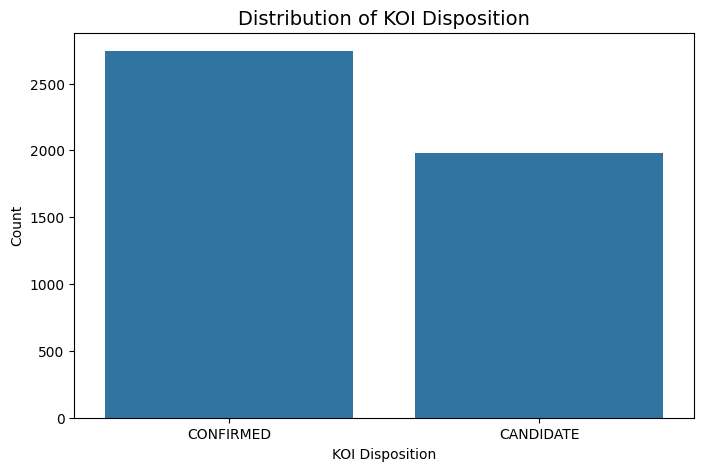

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='koi_disposition')
plt.title('Distribution of KOI Disposition', fontsize=14)
plt.xlabel('KOI Disposition')
plt.ylabel('Count')
plt.show()

In [12]:
df.isnull().mean() * 100

koi_disposition      0.000000
koi_score           12.002110
koi_fpflag_nt        0.000000
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_time0bk          0.000000
koi_impact           3.415985
koi_duration         0.000000
koi_depth            3.415985
koi_prad             3.415985
koi_teq              3.415985
koi_insol            2.888420
koi_model_snr        3.415985
koi_num_transits     8.981799
koi_tce_plnt_num     3.772092
koi_steff            3.415985
koi_slogg            3.415985
koi_smet             3.679768
koi_srad             3.415985
koi_smass            3.415985
ra                   0.000000
dec                  0.000000
koi_kepmag           0.013189
dtype: float64

In [13]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['koi_impact',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_smet',
 'koi_srad',
 'koi_smass',
 'koi_kepmag']

In [14]:
df[cols].sample(5)

,koi_impact,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_kepmag
1107,0.085,190.0,0.93,903.0,157.10,26.2,1.0,5229.0,4.643,-0.42,0.688,0.765,14.083
2308,0.034,340.0,2.48,590.0,28.60,53.9,2.0,6075.0,4.264,0.32,1.352,1.225,11.485
790,0.169,1230.0,2.47,774.0,84.76,39.8,1.0,4917.0,4.601,-0.08,0.723,0.761,15.444
1271,0.920,191.0,1.87,1026.0,262.18,41.2,1.0,5727.0,4.328,0.00,1.104,0.946,13.250
2163,0.560,50.4,1.84,2551.0,10025.53,22.9,1.0,6340.0,3.731,-0.58,2.498,1.223,13.297


In [15]:
len(df[cols].dropna()) / len(df)

0.9362964916908467

In [16]:
new_df = df[cols].dropna()

### Checking distrubtion in histograms, before and after CCA 

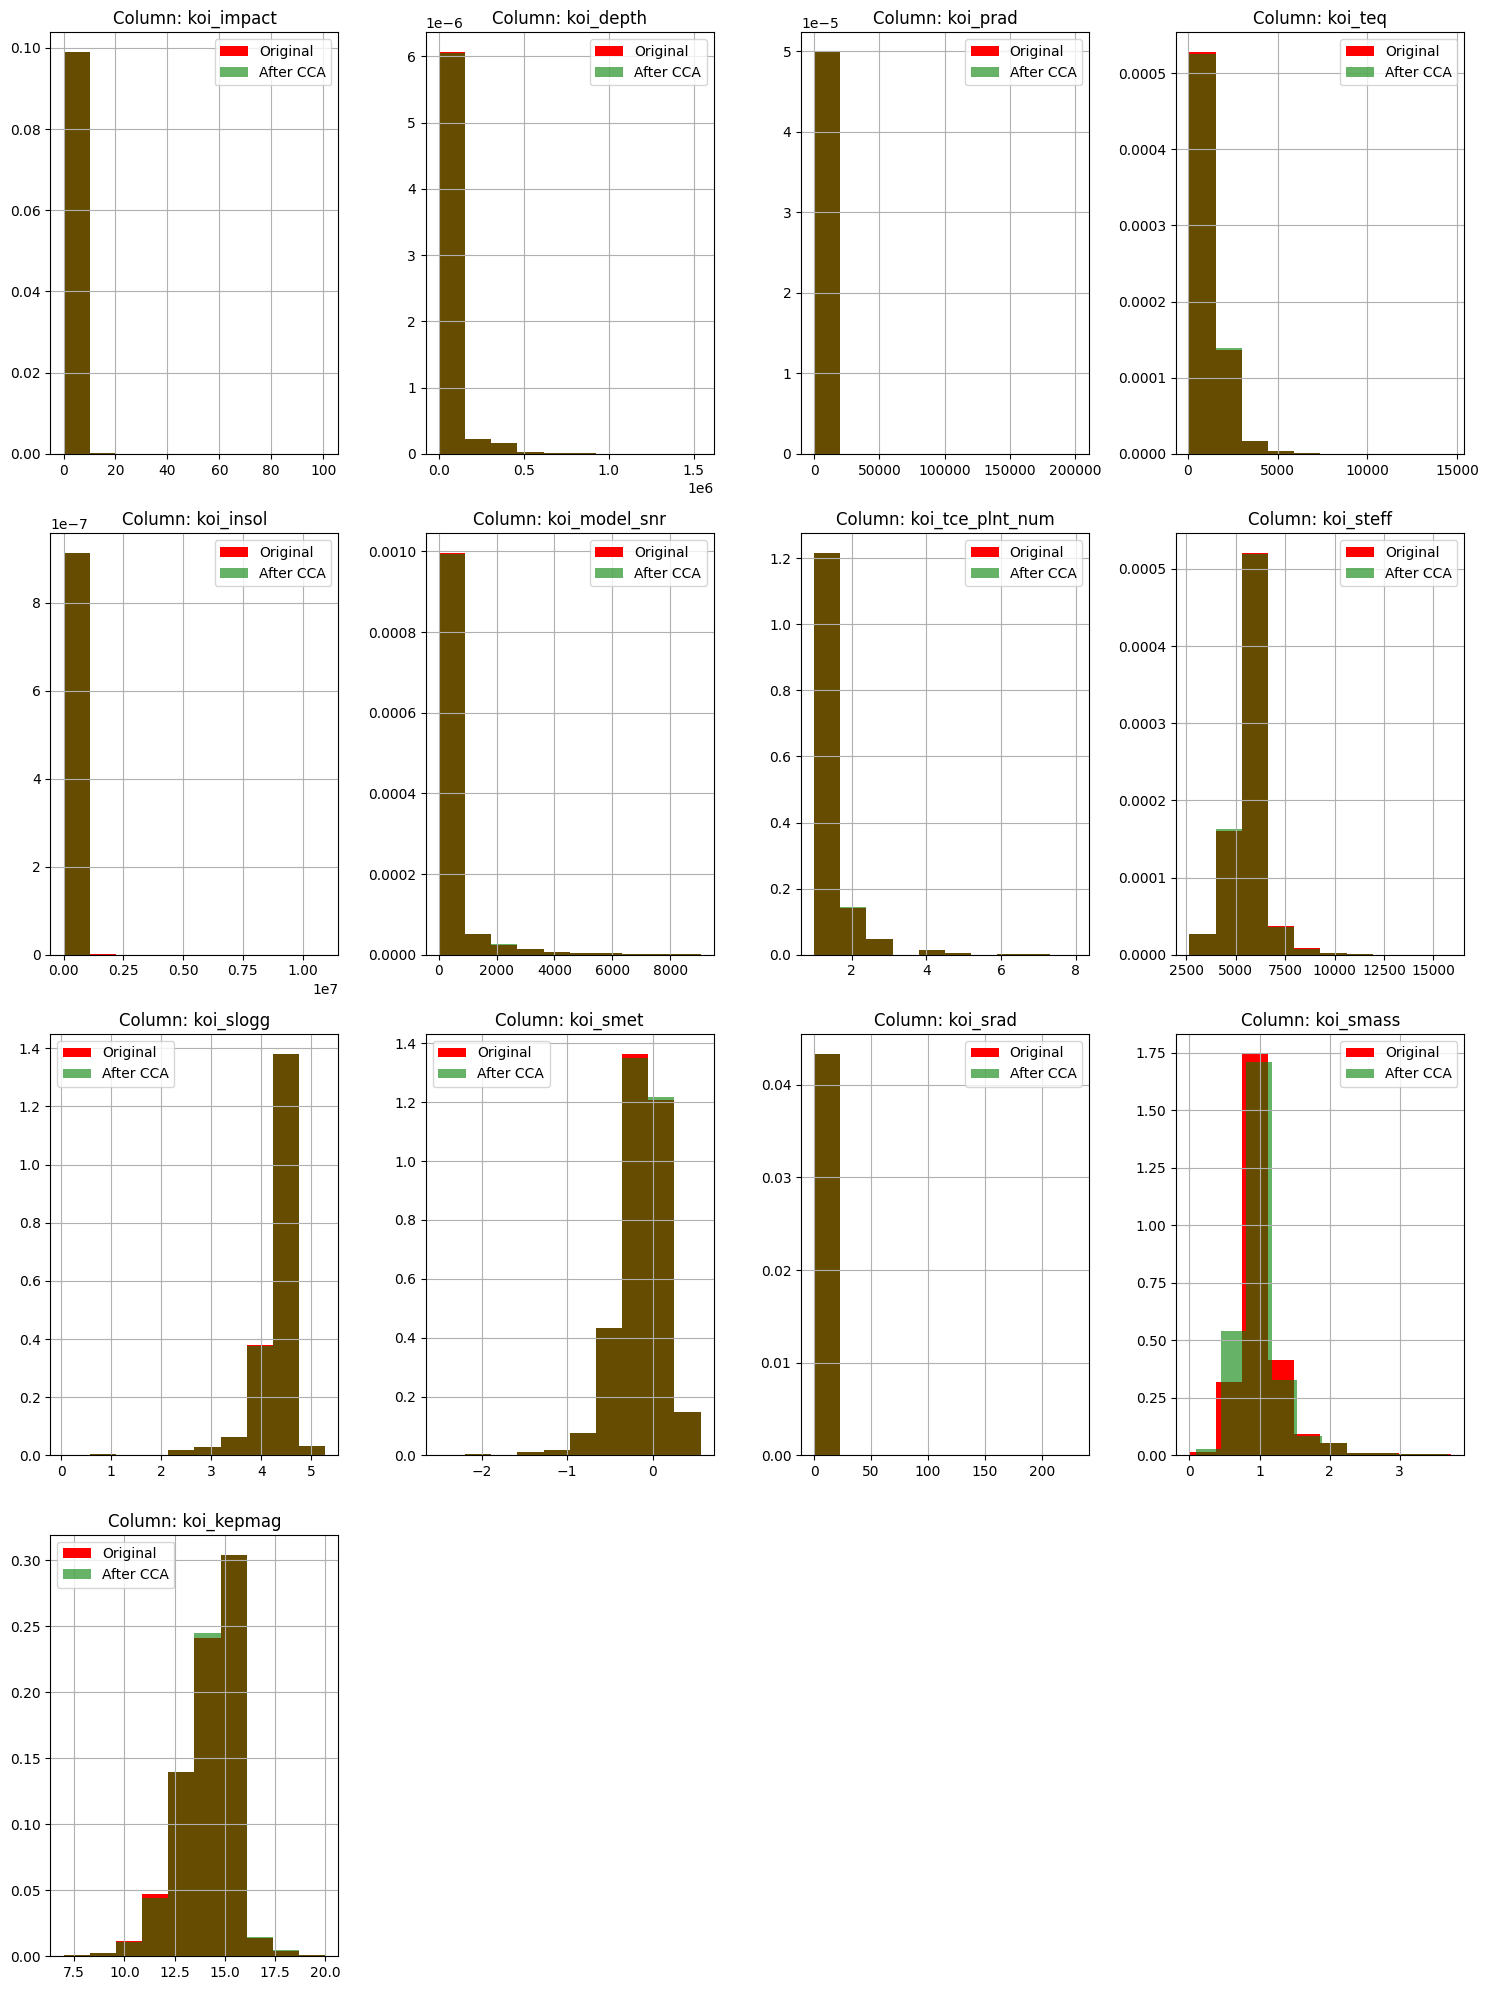

In [17]:
num_cols = len(cols)

cols_per_row = 4
rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row != 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    df[col].hist(ax=ax, density=True, color='red', label='Original')
    new_df[col].hist(ax=ax, density=True, color='green', label='After CCA', alpha=0.6)
    ax.set_title(f'Column: {col}')
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

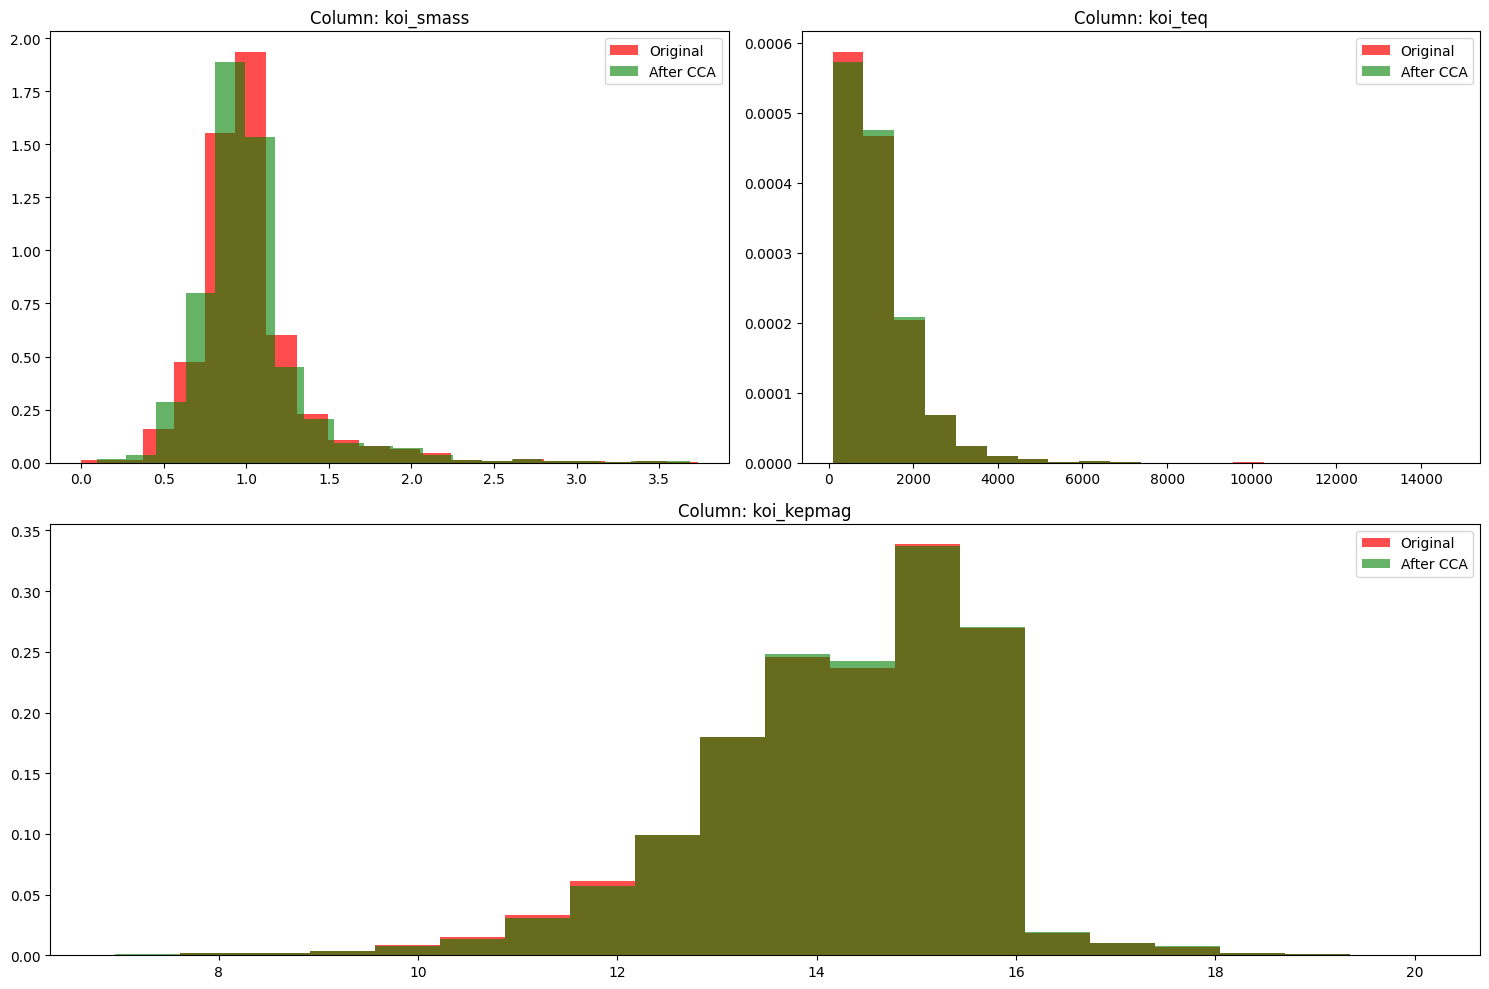

In [18]:
from matplotlib.gridspec import GridSpec

sample_cols = ['koi_smass', 'koi_teq', 'koi_kepmag']

fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax3 = fig.add_subplot(gs[1, :])

axes = [ax1, ax2, ax3]

for i, col in enumerate(sample_cols):
    axes[i].hist(df[col], density=True, color='red', label='Original', bins=20, alpha=0.7)
    axes[i].hist(new_df[col], density=True, color='green', label='After CCA', bins=20, alpha=0.6)
    axes[i].set_title(f'Column: {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [19]:
cols

['koi_impact',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_slogg',
 'koi_smet',
 'koi_srad',
 'koi_smass',
 'koi_kepmag']

In [20]:
columns_to_impute = ['koi_smass', 'koi_num_transits', 'koi_score']

minimal_missing_columns = list(set(cols) - set(columns_to_impute))

In [21]:
columns_to_impute

['koi_smass', 'koi_num_transits', 'koi_score']

In [22]:
minimal_missing_columns

['koi_teq',
 'koi_steff',
 'koi_srad',
 'koi_depth',
 'koi_kepmag',
 'koi_tce_plnt_num',
 'koi_model_snr',
 'koi_impact',
 'koi_insol',
 'koi_prad',
 'koi_slogg',
 'koi_smet']

In [23]:
complete_columns = list(set(df.columns) - set(minimal_missing_columns) - set(columns_to_impute))
complete_columns

['koi_duration',
 'koi_period',
 'koi_time0bk',
 'ra',
 'koi_disposition',
 'koi_fpflag_ss',
 'koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'dec']

In [24]:
len(df.columns) == len(complete_columns) + len(minimal_missing_columns) + len(columns_to_impute)

True

In [25]:
all_categorized_columns = set(minimal_missing_columns) | set(columns_to_impute) | set(complete_columns)
columns_match = set(df.columns) == all_categorized_columns
columns_match

True

In [26]:
# Drop rows with missing values in minimal_missing_columns
df_filtered = df.dropna(subset=minimal_missing_columns)

In [27]:
df_filtered.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_num_transits,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,...,142.0,1.0,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,...,25.0,2.0,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347
2,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,...,621.0,1.0,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597
3,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,...,515.0,1.0,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509
4,CONFIRMED,1.000,0,0,0,0,11.094321,171.201160,0.538,4.59450,...,95.0,1.0,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,15.714


In [28]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()

# Apply label encoder directly to the first column (koi_disposition)
df_filtered.iloc[:, 0] = le.fit_transform(df_filtered.iloc[:, 0])

# To see the mapping
print("Category mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

# To verify the transformation
print("\nFirst few rows of encoded data:\n")
print(df_filtered.head())

Category mapping:
CONFIRMED -> 0
FALSE POSITIVE -> 1

First few rows of encoded data:

  koi_disposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0               0      1.000              0              0              0   
1               0      0.969              0              0              0   
2               1      0.000              0              1              0   
3               0      1.000              0              0              0   
4               0      1.000              0              0              0   

   koi_fpflag_ec  koi_period  koi_time0bk  koi_impact  koi_duration  ...  \
0              0    9.488036   170.538750       0.146       2.95750  ...   
1              0   54.418383   162.513840       0.586       4.50700  ...   
2              0    1.736952   170.307565       1.276       2.40641  ...   
3              0    2.525592   171.595550       0.701       1.65450  ...   
4              0   11.094321   171.201160       0.538       4.59450  .

In [29]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Make copies to compare different methods
df_knn = df_filtered.copy()
df_mice = df_filtered.copy()
df_rf = df_filtered.copy()

In [30]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[columns_to_impute] = knn_imputer.fit_transform(df_filtered[columns_to_impute])

# MICE Imputation
mice_imputer = IterativeImputer(random_state=42)
df_mice[columns_to_impute] = mice_imputer.fit_transform(df_filtered[columns_to_impute])

# Random Forest Imputation
rf_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    random_state=42
)
df_rf[columns_to_impute] = rf_imputer.fit_transform(df_filtered[columns_to_impute])

/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


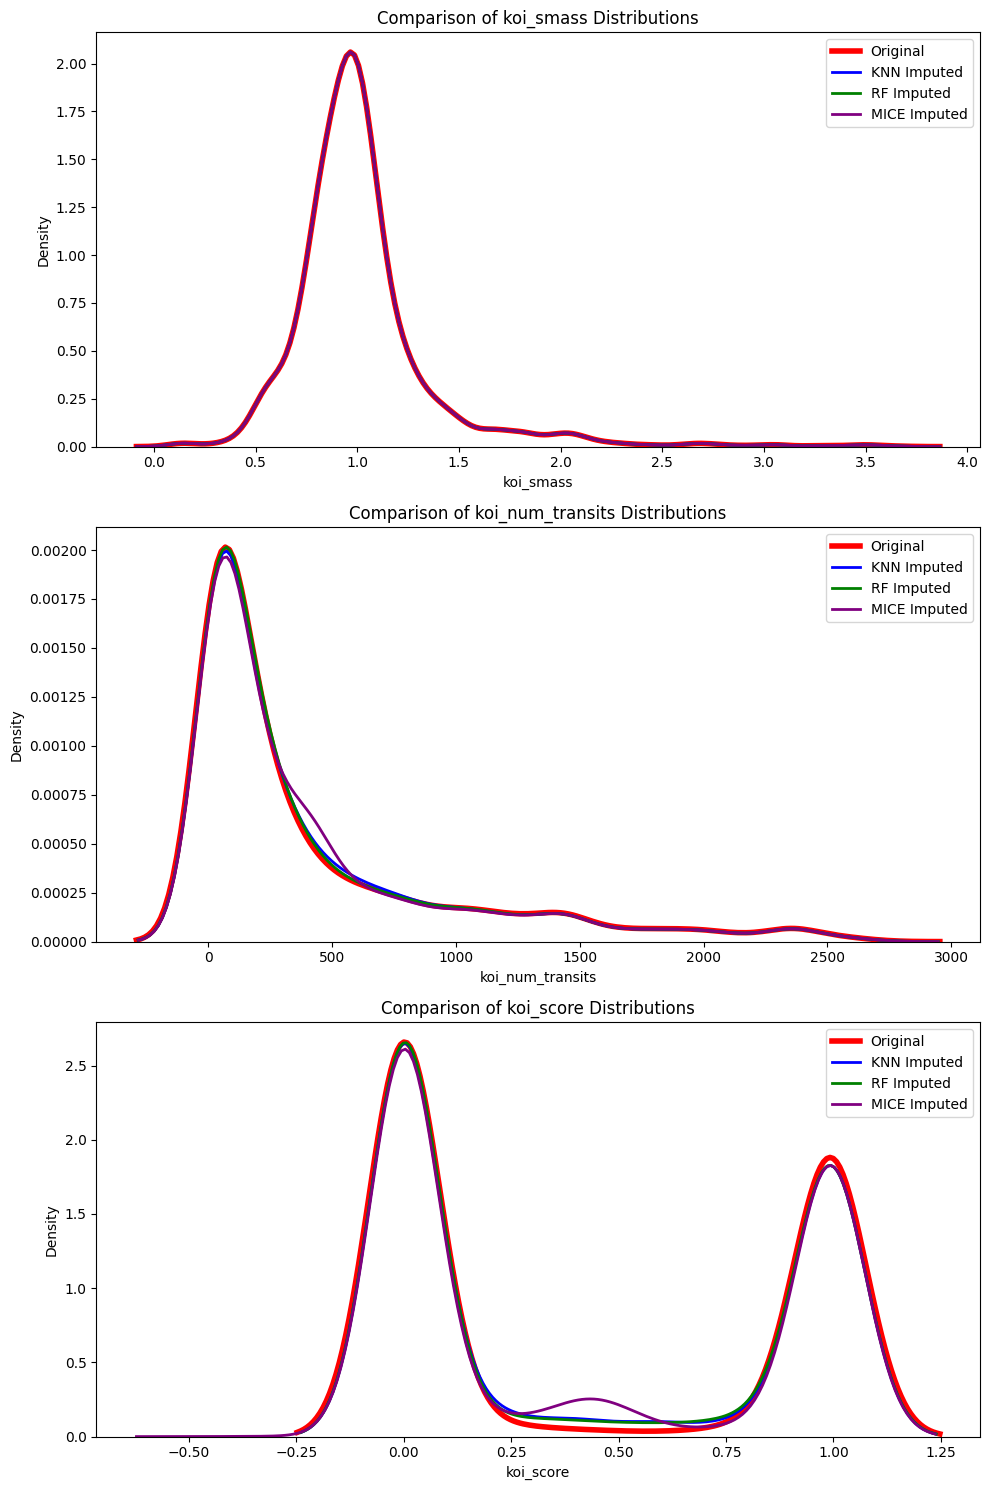

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Distributions for Comparison
fig, axes = plt.subplots(len(columns_to_impute), 1, figsize=(10, 5 * len(columns_to_impute)))

for i, column in enumerate(columns_to_impute):
    sns.kdeplot(
        data=df_filtered[column], 
        label="Original", 
        ax=axes[i], 
        color="red", 
        linewidth=4
    )
    sns.kdeplot(
        data=df_knn[column], 
        label="KNN Imputed", 
        ax=axes[i], 
        color="blue",
        linewidth=2,
    )
    sns.kdeplot(
        data=df_rf[column], 
        label="RF Imputed", 
        ax=axes[i], 
        color="green", 
        linewidth=2,
    )
    sns.kdeplot(
        data=df_mice[column], 
        label="MICE Imputed", 
        ax=axes[i], 
        color="purple",
        linewidth=2,
    )
    axes[i].set_title(f"Comparison of {column} Distributions")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [32]:
df_knn.isnull().sum()

koi_disposition     0
koi_score           0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_time0bk         0
koi_impact          0
koi_duration        0
koi_depth           0
koi_prad            0
koi_teq             0
koi_insol           0
koi_model_snr       0
koi_num_transits    0
koi_tce_plnt_num    0
koi_steff           0
koi_slogg           0
koi_smet            0
koi_srad            0
koi_smass           0
ra                  0
dec                 0
koi_kepmag          0
dtype: int64

In [33]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7099 entries, 0 to 7581
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   7099 non-null   object 
 1   koi_score         7099 non-null   float64
 2   koi_fpflag_nt     7099 non-null   int64  
 3   koi_fpflag_ss     7099 non-null   int64  
 4   koi_fpflag_co     7099 non-null   int64  
 5   koi_fpflag_ec     7099 non-null   int64  
 6   koi_period        7099 non-null   float64
 7   koi_time0bk       7099 non-null   float64
 8   koi_impact        7099 non-null   float64
 9   koi_duration      7099 non-null   float64
 10  koi_depth         7099 non-null   float64
 11  koi_prad          7099 non-null   float64
 12  koi_teq           7099 non-null   float64
 13  koi_insol         7099 non-null   float64
 14  koi_model_snr     7099 non-null   float64
 15  koi_num_transits  7099 non-null   float64
 16  koi_tce_plnt_num  7099 non-null   float64
 17  

<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/SDL/lib/python3.11/site-packages/matplotlib/pyplot.py'>

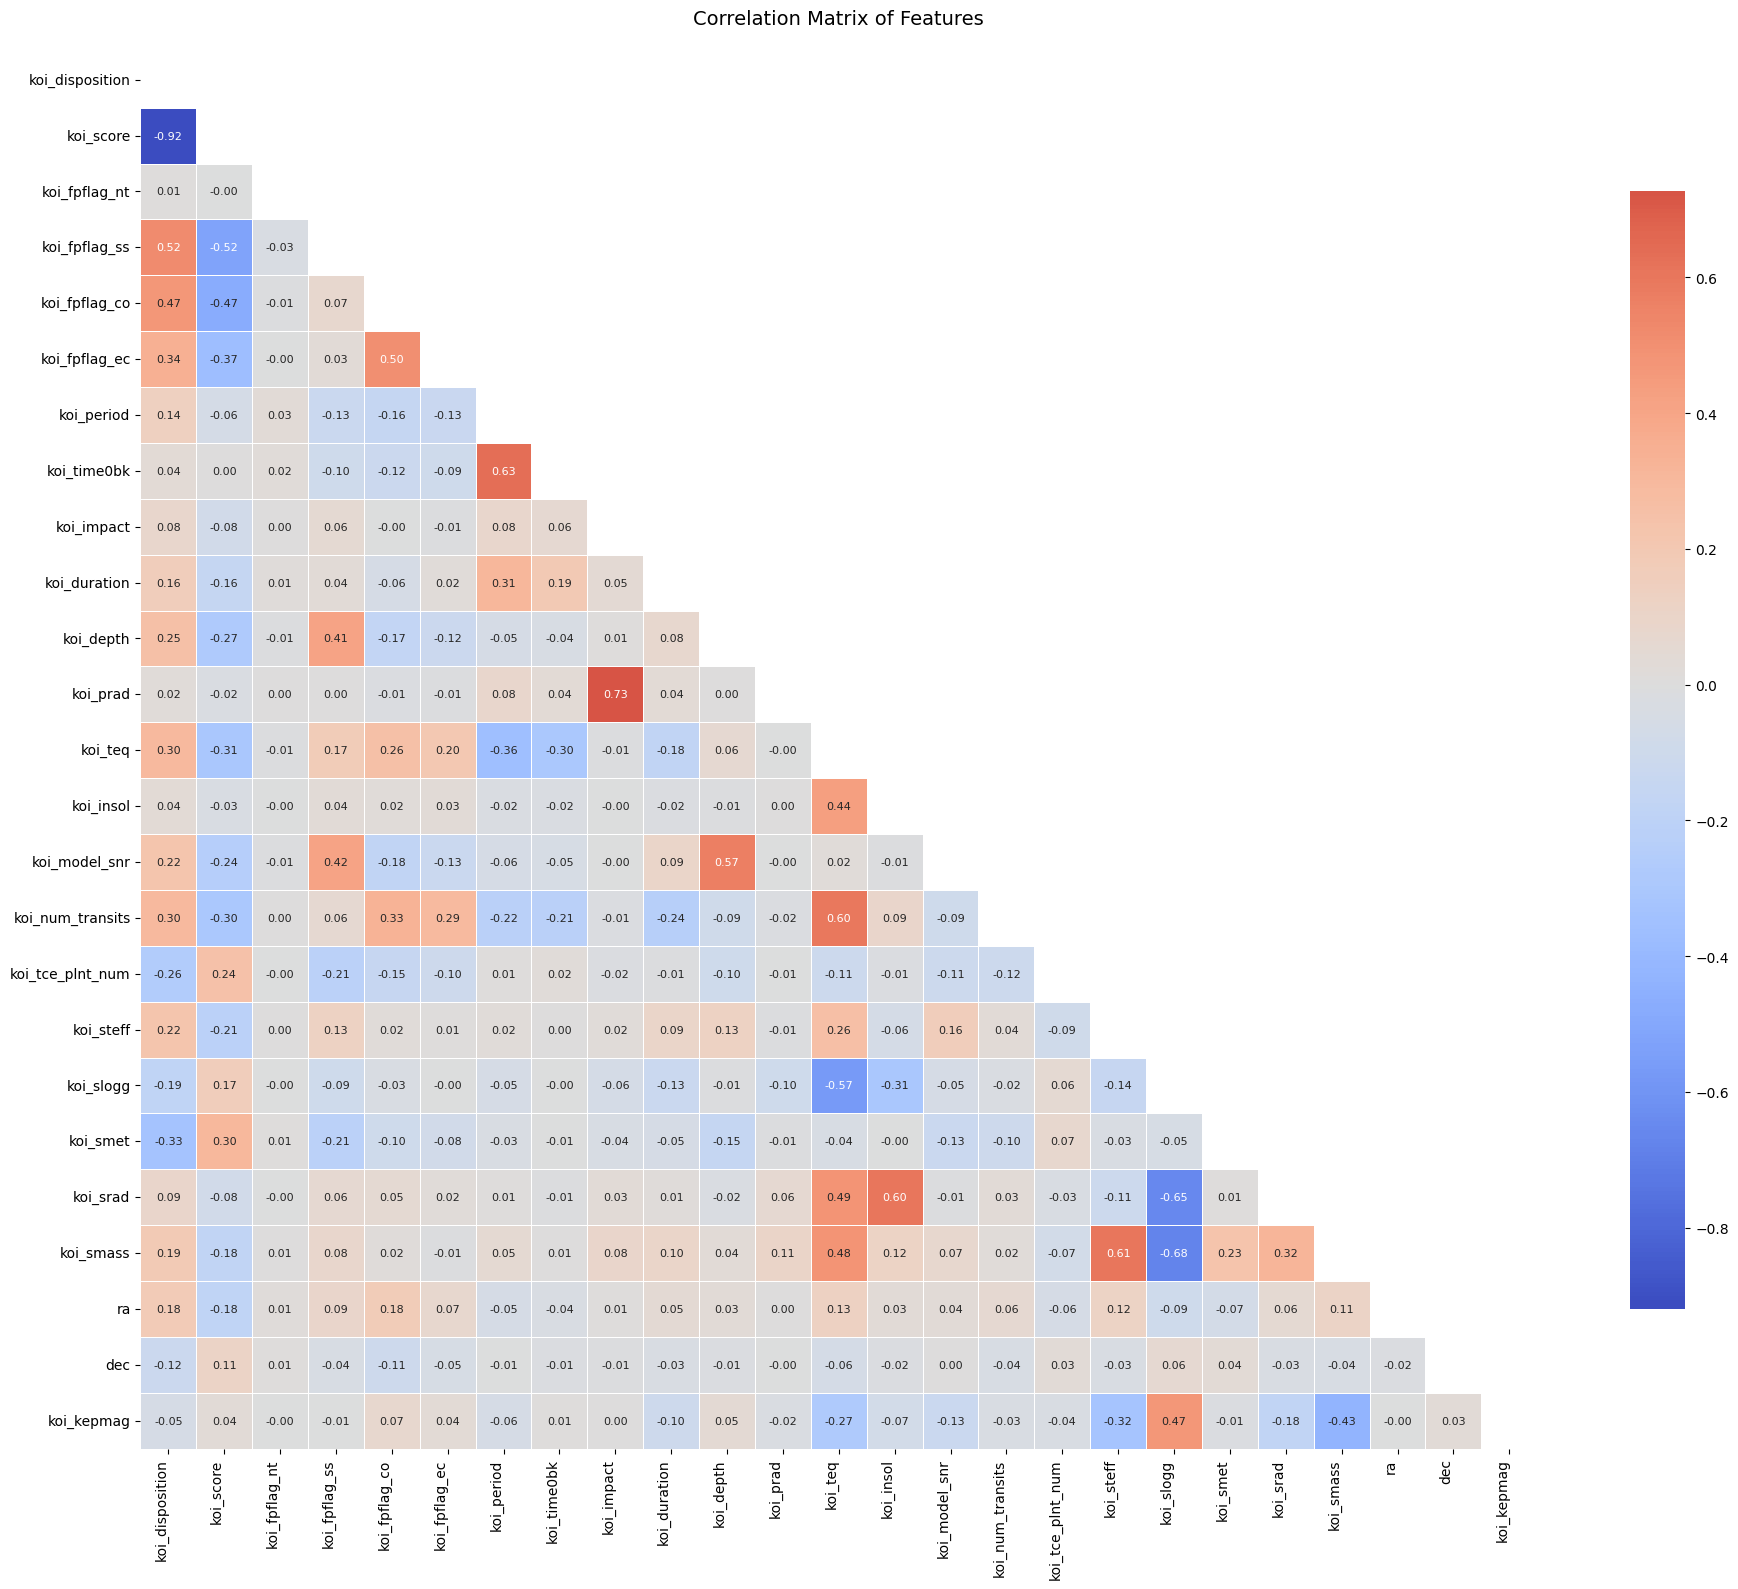

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_matrix(df, figsize=(20, 16)):
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Create mask for upper triangle to avoid redundancy
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Create heatmap with improved readability
    sns.heatmap(corr_matrix, 
                mask=mask,       
                annot=True,            
                cmap='coolwarm',      
                center=0, 
                fmt='.2f',             
                square=True,            
                linewidths=0.5,         
                annot_kws={'size': 8},  
                cbar_kws={'shrink': .8}
               )
    
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('Correlation Matrix of Features', pad=20, size=14)
    
    plt.tight_layout()
    
    return plt


plot_correlation_matrix(df_knn)

### Additional columns to drop:
```
ra
dec
koi_fpflag_nt
koi_tce_plnt_num
```